In [247]:
import sklearn
import numpy as np
import pandas as pd
import os
import numpy as np
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve, roc_curve, roc_auc_score
from sklearn.neural_network import MLPClassifier

In [248]:
data = pd.read_csv('Combined_Crash_Data_Cleaned_w_Street_Num.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [133]:
r_type = pd.get_dummies(data.RW_TYPE.astype(str), prefix='RW_TYPE')
borough = pd.get_dummies(data.BOROUGH.astype(str), prefix='BOROUGH')

In [134]:
data2 = data.merge(borough, left_index=True, right_index=True)
data3 = data2.merge(r_type, left_index=True, right_index=True)

['Unnamed: 0',
 'Unnamed: 0.1',
 'BOROUGH',
 'ZIP CODE',
 'LATITUDE',
 'LONGITUDE',
 'STREETWIDT',
 'RW_TYPE',
 'temp',
 'dwpt',
 'rhum',
 'prcp',
 'wdir',
 'wspd',
 'pres',
 'DAY',
 'MONTH',
 'YEAR',
 'HOUR',
 'MINUTE',
 'CRASH',
 'CRASHES ON ROAD',
 'BOROUGH_1.0',
 'BOROUGH_2.0',
 'BOROUGH_3.0',
 'BOROUGH_4.0',
 'BOROUGH_5.0',
 'RW_TYPE_1.0',
 'RW_TYPE_10.0',
 'RW_TYPE_12.0',
 'RW_TYPE_13.0',
 'RW_TYPE_14.0',
 'RW_TYPE_2.0',
 'RW_TYPE_3.0',
 'RW_TYPE_4.0',
 'RW_TYPE_5.0',
 'RW_TYPE_6.0',
 'RW_TYPE_7.0',
 'RW_TYPE_8.0',
 'RW_TYPE_9.0']

In [249]:
shuffled = data3.sample(frac=1)
shuffled.fillna(0, inplace=True)
y = shuffled['CRASH']
X = shuffled.drop(labels=['Unnamed: 0', 'Unnamed: 0.1', 'CRASH', 'ZIP CODE', 'BOROUGH', 'RW_TYPE', 'CRASHES ON ROAD'], axis=1)

In [283]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [284]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(
...     X_test, y_test, test_size=0.5, random_state=42)

In [285]:
model.fit(X_train, y_train)

ValueError: penalty='none' is not supported for the liblinear solver

In [236]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements


y_pred = model.predict(X_test)
cm = confusion_matrix(y_pred, y_test)
print("Accuracy of Logistic Regression Classifier : ", accuracy(cm))

Accuracy of Logistic Regression Classifier :  0.7407942934258723


In [237]:
print(cm)

[[179330  29169]
 [132171 281770]]


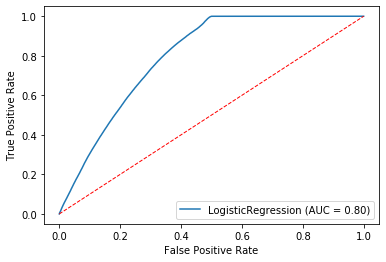

In [238]:
plot_roc_curve(model, X_dev, y_dev)
plt.plot((0,1),(0,1),color='red',linewidth=1,linestyle='--')
plt.show()

In [239]:
y_test = np.full(len(y_test), y_test)

In [240]:
positives = sum(y_test)
count_1 = 0
count_0 = 0
for i in range(len(y_test)):
    if y_test[i] == 1:
        if y_pred[i] == 1:
            count_1 += 1
    elif y_pred[i] == 0:
        count_0 += 1

acc_1 = count_1/positives
acc_0 = count_0/(len(y_test)-positives)
balanced_acc = (1/2)*(acc_0+acc_1)
class_acc = np.mean(y_test)*acc_1 + (1-np.mean(y_test))*acc_0

print('A_0: ', acc_0)
print('A_1: ', acc_1)
print('Balanced Accuracy: ', balanced_acc)
print('Class Accuracy: ', class_acc)

A_0:  0.5756963862074279
A_1:  0.9061906033016122
Balanced Accuracy:  0.74094349475452
Class Accuracy:  0.7407942934258724


In [241]:
list(X_train.columns)

['LATITUDE',
 'LONGITUDE',
 'STREETWIDT',
 'temp',
 'dwpt',
 'rhum',
 'prcp',
 'wdir',
 'wspd',
 'pres',
 'DAY',
 'MONTH',
 'YEAR',
 'HOUR',
 'MINUTE',
 'BOROUGH_1.0',
 'BOROUGH_2.0',
 'BOROUGH_3.0',
 'BOROUGH_4.0',
 'BOROUGH_5.0',
 'RW_TYPE_1.0',
 'RW_TYPE_10.0',
 'RW_TYPE_12.0',
 'RW_TYPE_13.0',
 'RW_TYPE_14.0',
 'RW_TYPE_2.0',
 'RW_TYPE_3.0',
 'RW_TYPE_4.0',
 'RW_TYPE_5.0',
 'RW_TYPE_6.0',
 'RW_TYPE_7.0',
 'RW_TYPE_8.0',
 'RW_TYPE_9.0']

In [104]:
model.coef_

array([[-6.61498753e-02, -3.96044644e-02, -4.51047018e-03,
        -3.34916134e-03,  2.68700373e-03,  2.58854701e-03,
         4.19893425e-03,  2.61649936e-04, -1.77537617e-04,
         1.24729411e-02,  2.02356941e-04, -3.73389170e-03,
        -6.16210532e-03,  5.01437971e-02, -1.65033006e-02,
         2.56365672e-06, -3.92068730e-02, -3.86144621e-02,
        -7.39919213e-02,  2.00450675e-01, -4.83363084e-02,
         4.78572798e-02, -9.48458093e-03, -4.34823873e-06,
        -7.26362423e-04, -8.93353833e-04, -9.12683146e-03,
        -4.64588330e-03, -3.69500573e-04, -2.60087964e-04,
        -1.16396295e-02, -4.35815826e-04, -1.62587181e-03,
        -8.34390325e-03]])

In [185]:
print(cm)

[[179590  29653]
 [131994 281203]]


#NEWTON NEURAL NETWORK

In [278]:
clf_newton = MLPClassifier(solver='lbfgs', activation='logistic', alpha=1e-5,
                    hidden_layer_sizes=(34), random_state=1)

In [279]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(
...     X_test, y_test, test_size=0.5, random_state=42)

In [280]:
clf_newton.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=35, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [281]:
y_pred = clf_newton.predict(X_dev)
cm = confusion_matrix(y_pred, y_dev)
print("Accuracy of MLPClassifier : ", accuracy(cm))

Accuracy of MLPClassifier :  0.7497168397224467


In [282]:
print(cm)

[[155567      0]
 [155786 311086]]


In [271]:
y_dev = np.full(len(y_dev), y_dev)

In [272]:
positives = sum(y_dev)
count_1 = 0
count_0 = 0
for i in range(len(y_pred)):
    if y_dev[i] == 1:
        if y_pred[i] == 1:
            count_1 += 1
    elif y_pred[i] == 0:
        count_0 += 1

acc_1 = count_1/positives
acc_0 = count_0/(len(y_dev)-positives)
balanced_acc = (1/2)*(acc_0+acc_1)
class_acc = np.mean(y_dev)*acc_1 + (1-np.mean(y_dev))*acc_0

print('A_0: ', acc_0)
print('A_1: ', acc_1)
print('Balanced Accuracy: ', balanced_acc)
print('Class Accuracy: ', class_acc)

A_0:  0.5003966558857631
A_1:  0.9985245237651325
Balanced Accuracy:  0.7494605898254478
Class Accuracy:  0.7493537519339244


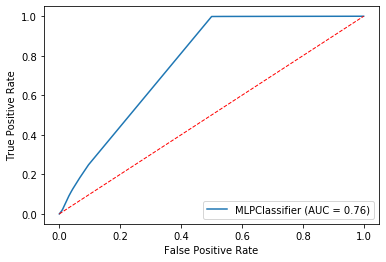

In [273]:
plot_roc_curve(clf_newton, X_test, y_test)
plt.plot((0,1),(0,1),color='red',linewidth=1,linestyle='--')
plt.show()